<h2>
    <center>
        Project IV: Tartans<br>
        Prof. Hollister<br><br>
        by Rinat Ibragimov<br>
    </center>
</h2>

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import regex
from enum import Enum

In [3]:
p_id = 50312446
# Tartan code corresponding to person id
p_code = p_id%31

In [145]:
# the code matches the tartan "MacKusick"
p_code

4

In [7]:
class Color(Enum):
    RB = [0,0,140]
    G = [0,120,0]
    DR = [140,0,0]
    K = [0,0,0]
    LN = [255,255,255]
    P = [100,0,140]

In [11]:
tartan_4 = 'RB8 K4 RB6 K24 P6 LN2 P6 K32 G6 LN4 DR2 LN4 G16 LN4DR2 LN4 G6 K32 P6 LN2 P6 K24'

In [104]:
def get_pattern(tartan_string):
    """
    Convert a tartan color pattern string into a list of tuples with the enum Colors defined above 
      and corresponding pixels
    
    @tartan_string: string tartan pattern

    return: list of (color, pixels) tuples
    """
    # List of (color, pixels) tuples
    scheme = []
    
    for s in tartan_string.split():
        col_match = regex.search(r'[A-Z]+', s)
        num_match = regex.search(r'\d+', s)
        
        if col_match is not None and num_match is not None:
            color = Color[col_match.group()].value
            px = int(num_match.group())
            
            for i in range(px):
                scheme.append(color)
    
    return scheme

In [112]:
scheme = get_pattern(tartan_4)
scheme[:20]

[[0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 140],
 [0, 0, 0],
 [0, 0, 0]]

In [127]:
def mesh_scheme(scheme):
    """
    'mesh' together the thread pattern and return it
    
    @scheme: original tartan thread color scheme
    
    return: the meshed thread
    """
    mesh = []
    # index
    mark = 0
    
    for i in range(1, len(scheme)+1):
        # if divisible by 2, use the next 2 colors in the scheme
        if i%2 == 0:
            mark+=1
            mesh.append(scheme[mark])
            mesh.append(scheme[mark+1])
    
    return mesh

In [129]:
meshed = mesh_scheme(scheme)

In [143]:
def show_tartan(size: int):
    """
    Merge and display the tartan based on initial meshed thread
    
    @size: threads to use for tartan
    
    return: None
    """
    tartan = []
    
    for i in range(size):
        pattern = np.roll(meshed, i)
        tartan.append(pattern)
    
    plt.imshow(tartan, figsize=(10,10))

AttributeError: 'AxesImage' object has no property 'figsize'

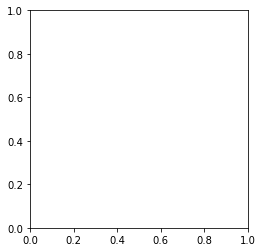

In [144]:
show_tartan(1000)